In [14]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
file_path = "/data/ana/Diffuse/GlobalFit_Flavor/NNMFit_Datasets/data/HESE12/WithoutDeepCore/data_HESE12_DoubleCascades/dataset_HESE12_DoubleCascades.hdf"

In [3]:
file = pd.HDFStore(file_path,'r')

In [11]:
data = file["dataset_HESE12_DoubleCascades"]
data


,,,event_id,mjd,reco_energy,reco_energy_exists,reco_energy_fit_status,reco_dir_fit_status,reco_dir,reco_dir_exists,reco_length,reco_length_exists,reco_length_fit_status,reco_lbye,reco_lbye_exists,econfinement,eratio,reco_azimuth,MCType
116528,52433389,0,52433389,55451.070748,76867.202820,1,0,0,0.955265,1,96.215525,1,1,0.001252,1,0.991452,-0.975365,5.901881,data
125979,54250116,0,54250116,57053.127266,89116.020771,1,0,0,2.623593,1,10.947699,1,1,0.000123,1,0.997415,0.298175,1.572520,data
126283,47286594,0,47286594,57134.398120,97190.438117,1,0,0,1.123959,1,17.318083,1,1,0.000178,1,1.000000,-0.873441,6.023320,data
134004,76376513,0,76376513,58963.928709,91155.101409,1,0,0,2.509549,1,14.064487,1,1,0.000154,1,0.994115,0.196553,5.196775,data
135136,69399950,0,69399950,59302.694783,111158.736091,1,0,0,1.075696,1,11.550423,1,1,0.000104,1,0.999985,0.000172,2.426418,data


In [15]:
# Select relevant columns
table_data = data[['mjd', 'reco_length', 'eratio','reco_energy']].copy()

mjd_epoch = datetime(1858, 11, 17)

table_data['year'] = pd.to_datetime(data['mjd'], origin=mjd_epoch, unit='D').dt.year

# Convert MJD to int
table_data['mjd'] = table_data['mjd'].astype(int)

# Round other columns and format as strings without trailing zeros
table_data['reco_length'] = table_data['reco_length'].map(lambda x: f'{x:.2f}'.rstrip('0').rstrip('.'))
table_data['eratio'] = table_data['eratio'].map(lambda x: f'{x:.3f}'.rstrip('0').rstrip('.'))

# Reset index to remove old indices
table_data = table_data.reset_index(drop=True)

# Output as LaTeX table
latex_table = table_data.to_latex(index=False, escape=False, column_format='rrr')
print(latex_table)

\begin{tabular}{rrr}
\toprule
mjd & reco_length & eratio & reco_energy & year \\
\midrule
55451 & 96.22 & -0.975 & 76867.202820 & 2010 \\
57053 & 10.95 & 0.298 & 89116.020771 & 2015 \\
57134 & 17.32 & -0.873 & 97190.438117 & 2015 \\
58963 & 14.06 & 0.197 & 91155.101409 & 2020 \\
59302 & 11.55 & 0 & 111158.736091 & 2021 \\
\bottomrule
\end{tabular}



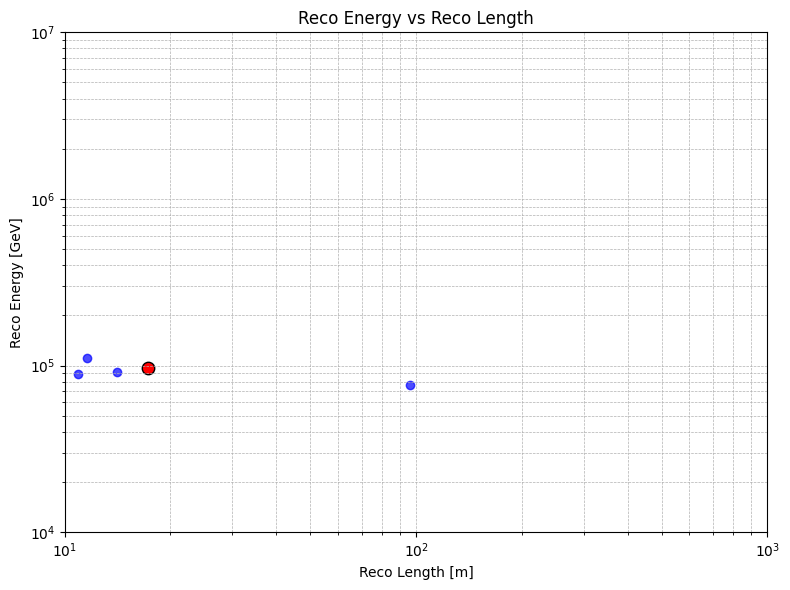

In [17]:
# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter( data["reco_length"],data["reco_energy"], c='blue', alpha=0.7)

# Highlight event with ID 47286594 in red
target_id = 47286594
target_mask = data["event_id"] == target_id
plt.scatter( data["reco_length"][target_mask],data["reco_energy"][target_mask],
            c='red', s=80, edgecolors='black', label=f'Event {target_id}')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e4, 1e7)
plt.xlim(10, 1000)
plt.ylabel('Reco Energy [GeV]')
plt.xlabel('Reco Length [m]')
plt.title('Reco Energy vs Reco Length')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()